 * Copyright 2024 Xue_Lexiang
 * Licensed under MIT (https://github.com/xuelx1/LearnQC/LISENCE)

In [17]:
from funcs import *
from qiskit.circuit.library import MCXGate
from qiskit import ClassicalRegister

In [18]:
def single_oracle(qc, str):
    n = len(str)
    if not (qc.num_qubits == n + 1):
        raise ValueError("qubit_num disagrees with string_length")
    for i in range(n):
        if str[i] == '0':
            qc.x(i)
    gate = MCXGate(n)
    qc.append(gate, range(n+1))
    for i in range(n):
        if str[i] == '0':
            qc.x(i)
    return qc


In [19]:
def oracle(qc, support_set):
    for str in support_set:
        qc = single_oracle(qc, str)
    return qc

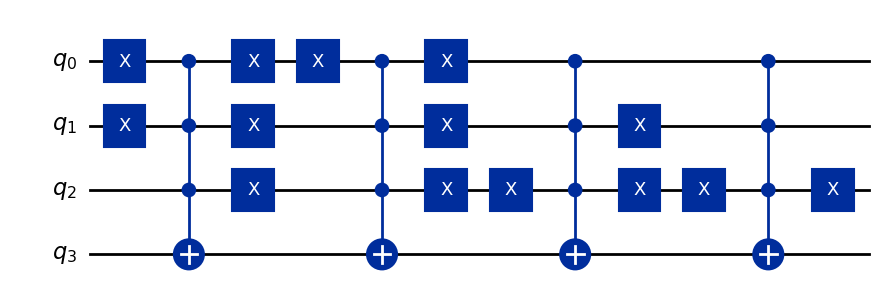

In [20]:
support_set = ['001', '010', '100', '110']
qc = QuantumCircuit(len(support_set[0])+1)
# qc.initialize([0, 1], 1)
qc = oracle(qc, support_set)
qc.draw(output='mpl')

### optimize quantum circuit

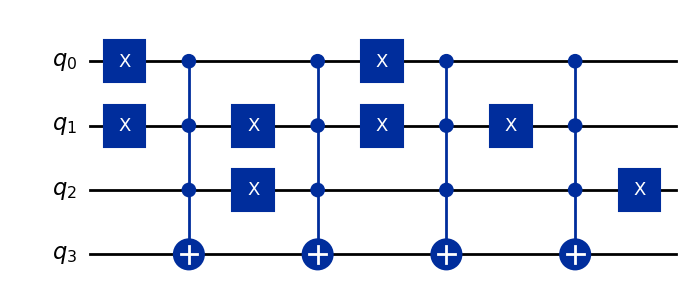

In [21]:
# transpile is an automatic optimization function
# Attention that transpile can only be used on a single coupling map
# So, add classical_register after transpiled.

qc = transpile(qc, backend=AerSimulator(), optimization_level=1)
qc.draw(output='mpl')

### test

In [22]:
c = ClassicalRegister(1)
qc.add_register(c)
qc.measure(3, c[0])
results = execute_qc(qc)
print(results)

{'0': 1024}


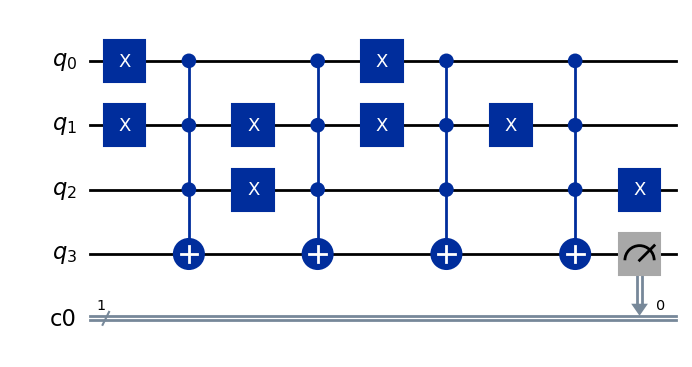

In [24]:
qc.draw(output='mpl')